In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("IPL.csv")
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [7]:
print(f"Your Rows are {df.shape[0]} and Columns are {df.shape[1]}.")

Your Rows are 74 and Columns are 20.


In [12]:
print("Checking for the Null Values in the dataset")
df.isnull().sum()

Checking for the Null Values in the dataset


match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

Graph of the most match winner in IPL


Text(0.5, 1.0, 'Most Match win by Team')

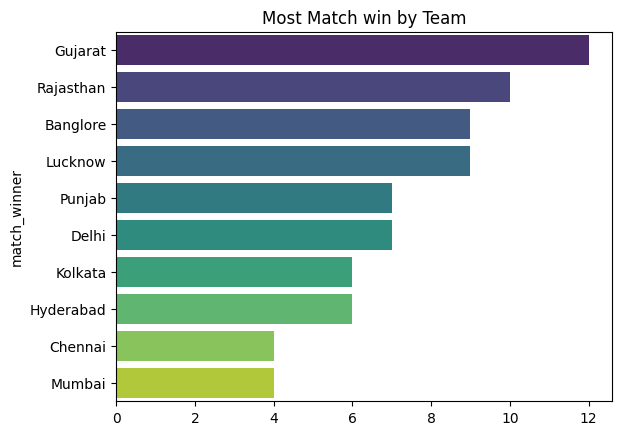

In [28]:
print("Graph of the most match winner in IPL")
match_winnerrs=df['match_winner'].value_counts()
sns.barplot(y=match_winnerrs.index,x=match_winnerrs.values,palette="viridis")
plt.title("Most Match win by Team")


Toss Decision


Text(0, 0.5, 'Numbers')

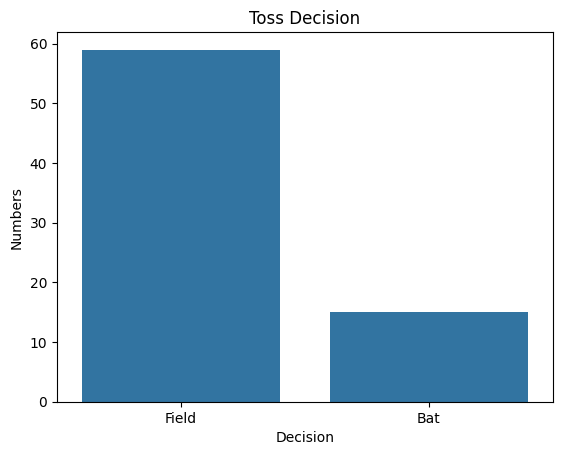

In [32]:
print("Toss Decision")
sns.countplot(x=df['toss_decision'])
plt.title("Toss Decision")
plt.xlabel("Decision")
plt.ylabel("Numbers")

In [37]:
print("Is winning of the toss really matters")
c=df[df['toss_winner']==df['match_winner']]['match_id'].count()
per=(c*100)/(df.shape[0]) 
print(f"The percentage of the following is {per.round(2)}.")

Is winning of the toss really matters
The percentage of the following is 48.65.


How does the Team won by Wickets or by Runs


Text(0.5, 1.0, 'Match Won ANALYSIS')

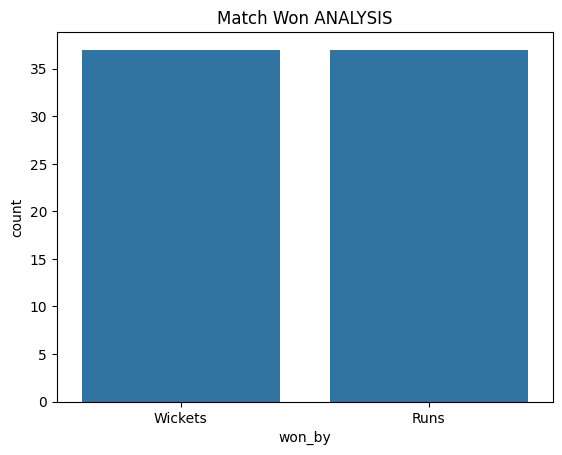

In [41]:
print("How does the Team won by Wickets or by Runs")
c=df['won_by']
sns.countplot(x=c)
plt.title("Match Won ANALYSIS")

Most Player of the Match Award


<Axes: ylabel='player_of_the_match'>

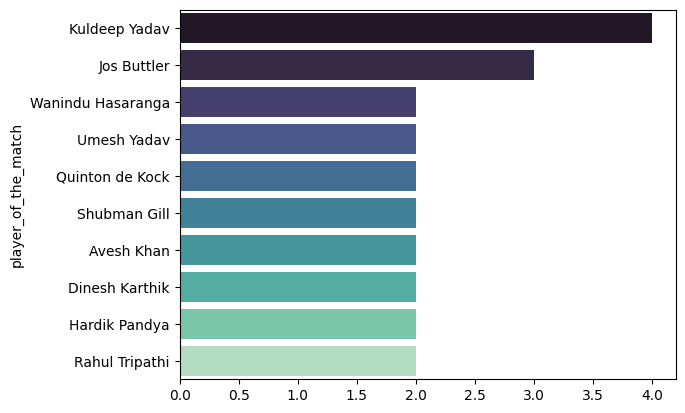

In [ ]:
print("Most Player of the Match Award")
count=df['player_of_the_match'].value_counts().head(10)
plt.title("Player of the Match")
sns.barplot(x=count.values,y=count.index,palette="mako")

Top Scorers


<Axes: title={'center': 'Top Scorer'}, xlabel='Runs', ylabel='Player'>

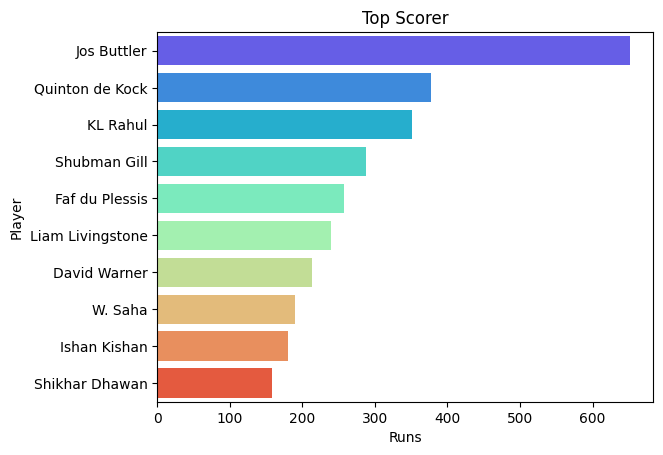

In [55]:
print("Top Scorers")
high_sccore=df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(10)
plt.title("Top Scorer")
plt.xlabel("Runs")
plt.ylabel("Player")
sns.barplot(y=high_sccore.index,x=high_sccore.values,palette="rainbow")


Best Baller


<Axes: title={'center': 'Best Bowlers'}, xlabel='Wickets', ylabel='Players'>

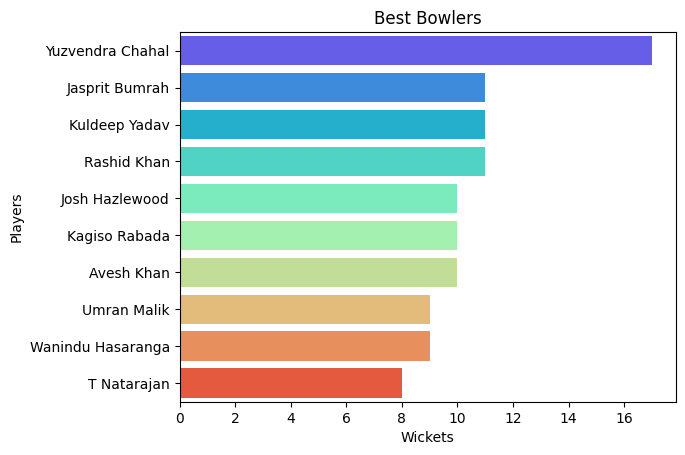

In [67]:
print("Best Baller")
df['highest_wicket']=df['best_bowling_figure'].apply(lambda x:x.split("--")[0])
df['highest_wicket']=df["highest_wicket"].astype(int)
top_ball=df.groupby('best_bowling')['highest_wicket'].sum().sort_values(ascending=False).head(10)
plt.title("Best Bowlers")
plt.xlabel("Wickets")
plt.ylabel("Players")
sns.barplot(y=top_ball.index,x=top_ball.values,palette="rainbow")


Venue Analysis


<Axes: ylabel='venue'>

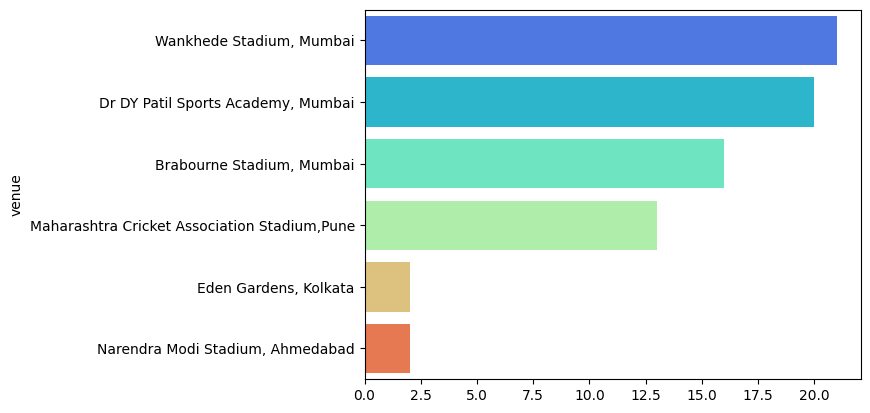

In [71]:
print("Venue Analysis")
vc=df['venue'].value_counts().head(10)
sns.barplot(x=vc.values,y=vc.index,palette="rainbow")

In [79]:
print("Who won by the hightes margin")
df[df['won_by']=='Runs'].sort_values(ascending=False,by="margin").head(1)[['match_winner','margin']]

Who won by the hightes margin


,match_winner,margin
54,Chennai,91


In [82]:
print('Which player have the highes individual score')
df[df['highscore']==df['highscore'].max()][['top_scorer','highscore']]

Which player have the highes individual score


,top_scorer,highscore
65,Quinton de Kock,140


In [85]:
print("Which bowler have the best figs")
df[df['highest_wicket']==df['highest_wicket'].max()][['best_bowling','best_bowling_figure']]

Which bowler have the best figs


,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40
39,Umran Malik,5--25
53,Wanindu Hasaranga,5--18
55,Jasprit Bumrah,5--10
